## BT5153 Assignment II
### How CNN see and understand Images

*  **Due on 03 April 2020, Friday at 23:59pm**
*  **Submit your solution notebook to "LumiNUS -> Files->HW2-Assignment**

The convolutional network (CNN), that is especially suited for feature extraction of image data. A CNN is a neural network typically composed of two components:
1. one component for extracting useful features of the data: **Convolutional Layer** and **Pooling Layer**

2. another for performing a ML task (like classification based on the featurized data): **Fully-connected Layer**

In this assignment, we will focus on feature extraction parts behind CNN, i.e., convolutional layer and pooling layer. We hope you can gain more understanding about CNN through this section. 

##### Filter Operation

<img src="filter.gif" width="400" align="center">

##### Pooling Operation

![pool](pool.png)

### Warm-Up

Prepare the image "T" as a 2D Numpy array. And visualize it.

In [1]:
import numpy as np
img = np.array([
[1,1,1,1,1,1],
[1,1,1,1,1,1],
[0,0,1,1,0,0],
[0,0,1,1,0,0],
[0,0,1,1,0,0],
[0,0,1,1,0,0],]
)

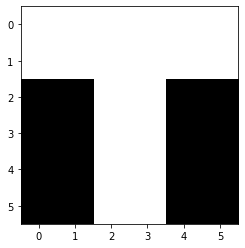

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.imshow(img, cmap='gray')

Generate the kernel

In [3]:
filters = np.array([[1, 1, 1],
                  [1, 1, 1],
                  [0, 0, 0]])

Use this kernel and convolve over the image with same border mode (with [scipy.signal.convolve2d](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve2d.html)).**

In [4]:
from scipy.signal import convolve2d
fil_imgs = convolve2d(img, filters, mode='same')

Plot the image.

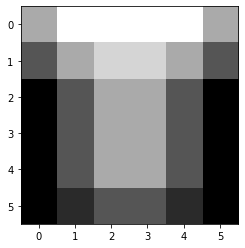

In [5]:
plt.imshow(fil_imgs, cmap='gray')

Take a moment to examine the convolved images. You should see that convolutional filters can both accentuate and dampen specific features in input images such as curves, edges or colours. .

Now you may design a new filter as [[1, 1, 0], [1, 1, 0],[1, 1, 0]]. And check the results

In [6]:
filters_2 = np.array([[1, 1, 0],
                      [1, 1, 0],
                      [1,1, 0]])

In [7]:
filters_2

array([[1, 1, 0],
       [1, 1, 0],
       [1, 1, 0]])

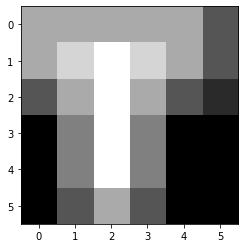

In [8]:
fil_imgs2 = convolve2d(img, filters_2, mode='same')
plt.imshow(fil_imgs2, cmap='gray')

1. **Different convolutional filters extract different features** 
2. it is the combination of the resulting feature maps that powers the CNNs predictions. 
3. In the following, we add non-linear activation and pooling functions on a real image

### Part 2:  Pokemon Convolution!

Yup, it is not Pokemon go.


**Exercise #1: Apply the Edge detection filter on the Pokemon?  (3 points)**


Consider the following image of a pikka, which you will find in `pokemon.png`:

![pik](pokemon.png)

The image is already normalized into the scale [0, 1].

**Perform the following steps for four images:**

**1. Create the edge detection filter.**

As shown in the slide

**2. Use this kernel and convolve over the image with same border mode (with [scipy.signal.convolve2d])**

**3. Plot the image**

**4. In the resulting image, set all pixel values less than zero to zero (using np.clip()). In other words:**


`
if x < 0:
    x = 0
else:
    x = x
`

(What is the non-linear activation function?)

In [9]:
from matplotlib.image import imread
import numpy as np
img = imread('pokemon.png')

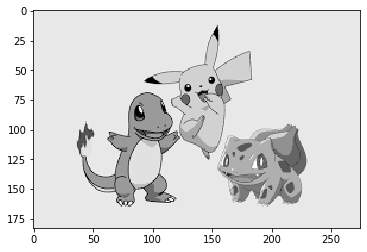

In [10]:
plt.imshow(img, cmap='gray')

In [11]:
print(img.max(), img.min())

1.0 0.0


In [12]:
img.shape

(183, 275)

In [13]:
# generate one kernel for edge detection
#kernel = np.array(3 BY 3 MATRIX)

In [14]:
print(kernel)

[[ 1  0 -1]
 [ 0  0  0]
 [-1  0  1]]


In [15]:
#conv_img =  convolve2d(PUT THE IMAGE AND FILTER AND SET THE BORDER MODE)

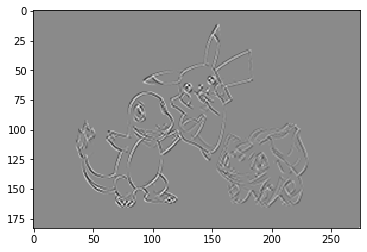

In [16]:
# here assume the conv_img is the output of the filter operation
plt.imshow(conv_img, cmap='gray')

In [17]:
# here assume the conv_img_nonlinear is the output of the POOLING operation
#conv_img_nonlinear = np.clip()

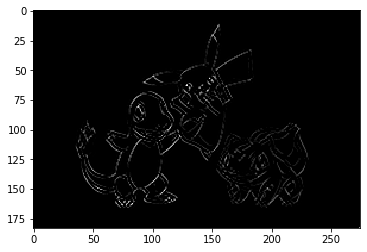

In [18]:
# here assume the conv_img_nonlinear is the output of the filter operation
plt.imshow(conv_img_nonlinear,cmap='gray')

https://en.wikipedia.org/wiki/Grayscale

**Exercise #2:  (3 points)**

**1. Apply max-pooling operation over the image Here, the pooling size is set to (2, 2)**

Hint:
(https://stackoverflow.com/questions/42463172/how-to-perform-max-mean-pooling-on-a-2d-array-using-numpy)


**2. Plot the final image.**

**3. Change the pooling sizes and check its effects on the generated feature maps.**

In [19]:
# here assume the pool_img is the output of the pooling operation
#pool_img

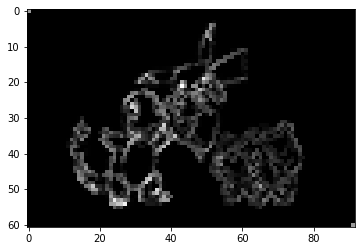

In [20]:
# here assume the conv_img_nonlinear is the output of the filter operation
plt.imshow(pool_img,cmap='gray')

In [21]:
# Then, this vector can be fed into the dense layers to predict the label
final_vec = pool_img.flatten()

Fortunately, we do not need to implement Convolutional and Pooling layer from stratch. In keras tutorial, we have already built a CNN model for Fashion-MNIST data. The gradients can be automatically computed and the model weights can then be learned. Then, we may ask ourselves What does a CNN learn? 

Let us firstly modify the CNN code for week5 notebook (make it 'simpler')

In [22]:
from keras.layers import Conv2D, MaxPooling2D, Input, Flatten, Dense, Dropout
from keras.models import Sequential
import keras
data = keras.datasets.fashion_mnist
(x_train_all, y_train_all), (x_test_all, y_test_all) = data.load_data()

Using TensorFlow backend.


In [23]:
class_names = [ "T-shirt/top", "Trouser", "Pullover", 
                "Dress", "Coat", "Sandal", "Shirt",
                "Sneaker", "Bag", "Ankle boot" ]
# take images from only two class: Sneaker and Ankle boot
x_train = x_train_all[(y_train_all == 7) | (y_train_all == 9)]
y_train = y_train_all[(y_train_all == 7) | (y_train_all == 9)]
y_train[y_train==7] = 0
y_train[y_train==9] = 1

In [24]:
x_train.shape

(12000, 28, 28)

In [25]:
x_test = x_test_all[(y_test_all == 7) | (y_test_all == 9)]
y_test = y_test_all[(y_test_all == 7) | (y_test_all == 9)]
y_test[y_test==7] = 0
y_test[y_test==9] = 1

In [26]:
x_test.shape

(2000, 28, 28)

In [27]:
y_train

array([1, 0, 1, ..., 1, 0, 0], dtype=uint8)

In [28]:
x_train = x_train.reshape(12000, 28, 28, 1)
x_test  = x_test.reshape(2000, 28, 28, 1)

x_val, x_train = x_train[:1000] / 255.0, x_train[1000:] / 255.0
y_val, y_train = y_train[:1000] , y_train[1000:] 

In [29]:
x_train.shape

(11000, 28, 28, 1)

In [30]:
kernel_size = (3, 3)
stride_size = (1, 1)
num_filters = 4

cnn_model = Sequential()
# feature extraction layer 0: convolution
cnn_model.add(Conv2D(num_filters, 
                     kernel_size=kernel_size,
                     activation='relu',
                     input_shape=(28, 28, 1)))
# feature extraction layer 1: max pooling
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
# classification layer 2: flattening
cnn_model.add(Flatten())
# classification layer 3: dense non-linear transformation
cnn_model.add(Dense(100, activation='relu'))
# classification layer 4: output label probability
cnn_model.add(Dense(1, activation='sigmoid'))

cnn_model.compile(loss='binary_crossentropy',
                  optimizer=keras.optimizers.adam(lr=0.01),
                  metrics=['accuracy'])

In [31]:
history = cnn_model.fit(x_train, 
                        y_train, 
                        epochs=20,
                        validation_data=(x_val, y_val))

Train on 11000 samples, validate on 1000 samples
Epoch 1/20
11000/11000 [==============================] - 3s 259us/step - loss: 0.1540 - accuracy: 0.9435 - val_loss: 0.0911 - val_accuracy: 0.9690
Epoch 2/20
11000/11000 [==============================] - 3s 241us/step - loss: 0.0877 - accuracy: 0.9676 - val_loss: 0.0658 - val_accuracy: 0.9760
Epoch 3/20
11000/11000 [==============================] - 2s 225us/step - loss: 0.0730 - accuracy: 0.9737 - val_loss: 0.0781 - val_accuracy: 0.9740
Epoch 4/20
11000/11000 [==============================] - 3s 251us/step - loss: 0.0705 - accuracy: 0.9738 - val_loss: 0.0611 - val_accuracy: 0.9800
Epoch 5/20
11000/11000 [==============================] - 3s 235us/step - loss: 0.0620 - accuracy: 0.9765 - val_loss: 0.0567 - val_accuracy: 0.9770
Epoch 6/20
11000/11000 [==============================] - 2s 224us/step - loss: 0.0587 - accuracy: 0.9759 - val_loss: 0.0595 - val_accuracy: 0.9770
Epoch 7/20
11000/11000 [==============================] - 2s 22

## C. Let us crack the above CNN open

**What does CNN learn?** 

Now we want to get an intuitive understanding of what hidden layers i.e., conv. layers and pooling layers in a CNN are learning from the data.

Here, we are trying to find the answers from two persepctives. 

1. Visualize the learned filter weights.

2. Visualize the hidden layers' outputs given input images


**Exercise #3: visualize the weights of the filters in the above CNN model. Explain how each filter is applied to the input image. (6 points)**

**Hint**: Firstly, find the number of filters. And then, how about the filter size?

**Hint**: Conv-Layer in Keras contain two kinds of weights: one is filter weights and bias weights. Here, we are only interested at the filter weights.

**Hint**: https://ai-pool.com/d/how-to-get-the-weights-of-keras-model-

In [32]:
# function to visualize images or weights from vector or matrix in grey scale
def plot_fig(figax, img, image_shape):
    vmax = max(img.max(), -img.min())
    figax.imshow(img.reshape(image_shape), cmap=plt.cm.gray,
                 vmin=-vmax, vmax=vmax)
    return figax

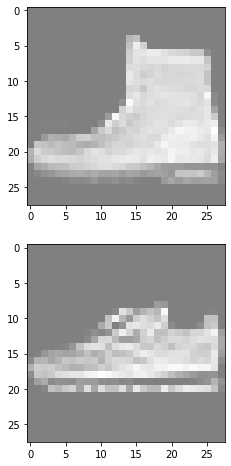

In [33]:
# let us visualize two of the input images
fig, ax = plt.subplots(2, 1, figsize=(5, 8))
boot_x = x_train[0,:,:]
sneaker_x   = x_train[1,:,:]
ax[0] = plot_fig(ax[0], boot_x, (28, 28))
ax[1] = plot_fig(ax[1], sneaker_x, (28, 28))

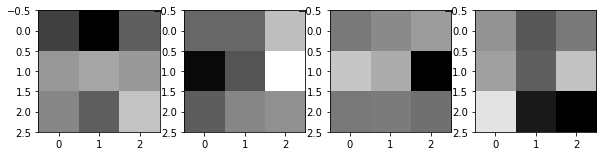

In [34]:
# we visualize the four filters we learned
fig, ax = plt.subplots(1, 4, figsize=(10, 5))
#ax[0] = plot_fig(ax[0], WEIGHTS for the first filter, (3, 3))
#ax[1] = plot_fig(ax[1], WEIGHTS for the second filter, (3, 3))
#ax[2] = plot_fig(ax[2],  WEIGHTS for the third filter, (3, 3))
#ax[3] = plot_fig(ax[3],  WEIGHTS for the fourth filter, (3, 3))
plt.show()

**Exercise #4: visualize the output of the convolutional layer and the pooling layer separately. Describe how each layer has transformed the data. (8 points)** 

**Hint**: https://keras.io/getting-started/faq/#how-can-i-obtain-the-output-of-an-intermediate-layer

**Hint**: In the first week's notebook session, we talked about the sklearn model can only take two-dimensional data as inputs. Here, you may encounter the similar issue. Then, np.expand_dims may be helpful.

In [35]:
# using the backend.function in keras
from keras import backend as K
get_conv_layer_output = K.function([cnn_model.layers[0].input],
                                  [cnn_model.layers[0].output])

In [43]:
print(boot_x.shape)
#get the conv-output of the boot image
#layer_outputforboot = get_conv_layer_output(PUT BOOT IMAGE)[0]

(28, 28, 1)


In [36]:
layer_outputforboot.shape

(1, 26, 26, 4)

In [37]:
# visualize a training image "boot_x" after it passes through the above four filters
fig, ax = plt.subplots(1, 4, figsize=(10, 5))
#ax[0] = plot_fig(ax[0], FEATURE MAP of the first filter on boot_x, (26, 26))
#ax[1] = plot_fig(ax[1], FEATURE MAP of the second filter on boot_x, (26, 26))
#ax[2] = plot_fig(ax[2], FEATURE MAP of the third filter on boot_x, (26, 26))
#ax[3] = plot_fig(ax[3], FEATURE MAP of the fourth filter on boot_x, (26, 26))
plt.show()

In [38]:
#get the conv-output of the sneaker image
#layer_outputforsneaker = get_conv_layer_output(PUT SNEAKER IMAGE)[0]

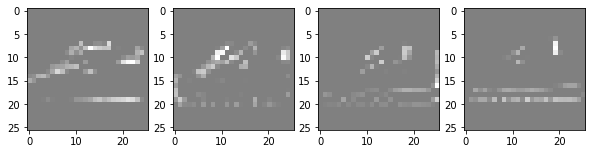

In [39]:
# visualize a training image "sneaker_x" after it passes through the above four filters
fig, ax = plt.subplots(1, 4, figsize=(10, 5))
#ax[0] = plot_fig(ax[0], FEATURE MAP of the first filter on sneaker_x, (26, 26))
#ax[1] = plot_fig(ax[1], FEATURE MAP of the second filter on sneaker_x, (26, 26))
#ax[2] = plot_fig(ax[2], FEATURE MAP of the third filter on sneaker_x, (26, 26))
#ax[3] = plot_fig(ax[3], FEATURE MAP of the fourth filter on sneaker_x, (26, 26))
plt.show()

#### Pooling Layer

In [40]:
#get_pool_layer_output = K.function([cnn_model.layers[0].input], PUT POOL-LAYER-OUTPUT HERE)
#pool_outputforboot = get_pool_layer_output(PUT BOOT IMAGE)[0] 

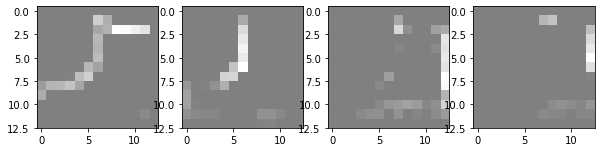

In [41]:
# visualize the training image "boot_x" after it passes through the above four filters + pooling layer
fig, ax = plt.subplots(1, 4, figsize=(10, 5))
#ax[0] = plot_fig(ax[0], OUTPUT of the first filter+pooling layer on boot_x, (13, 13))
#ax[1] = plot_fig(ax[1], OUTPUT of the second filter+pooling layer on boot_x, (13, 13))
#ax[2] = plot_fig(ax[2], OUTPUT of the third filter+pooling layer on boot_x, (13, 13))
#ax[3] = plot_fig(ax[3], OUTPUT of the fourth filter+pooling layer on boot_x, (13, 13))
plt.show()

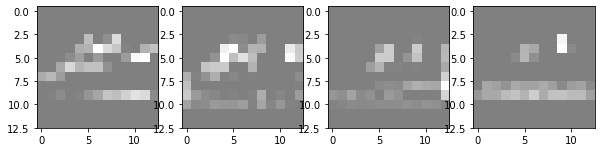

In [42]:
#pool_outputforboot = get_pool_layer_output(PUT SNEAKER IMAGE)[0] 
# visualize the training image "sneaker_x" after it passes through the above four filters + pooling layer
fig, ax = plt.subplots(1, 4, figsize=(10, 5))
#ax[0] = plot_fig(ax[0], OUTPUT of the first filter+pooling layer on sneaker_x, (13, 13))
#ax[1] = plot_fig(ax[1], OUTPUT of the second filter+pooling layer on sneaker_x, (13, 13))
#ax[2] = plot_fig(ax[2], OUTPUT of the third filter+pooling layer on sneaker_x, (13, 13))
#ax[3] = plot_fig(ax[3], OUTPUT of the fourth filter+pooling layer on sneaker_x, (13, 13))
plt.show()

**Through this homework, we hope you can find the evidences that Conv-layer and pooling-layer in CNN are especailly suitable for feature extraction of image data.**